In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [49]:
mpl.rcParams.update({'figure.facecolor': 'white',
                     'font.size': 14,
                     'xtick.labelsize': 11,
                     'ytick.labelsize': 11,
                     'figure.figsize':(16,9),
                     'figure.dpi': 300})

In [50]:
df = pd.read_csv(r'C:\Users\admin\Desktop\Data Science\Course-2021\05-Seaborn\application_record.csv')

In [51]:
df.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005          -4542   
1        Civil marriage   Rented apartment      -12005          -4542   
2               Married  House / apartment      -21474          -1134   
3  Single / not married  House / apartment      -19110          -3051   
4  Single / not married  House / apartment      -19110          -3051   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                1           0           0             NaN   
1           1                1           0           0             NaN   
2           1                0           0           0  Security staff   
3           1                0           1           1     Sales staff   
4           1                0           1           1     Sales staff   

   CNT_FAM_MEMBERS  
0              2.0  
1              2.0  
2              2.0  
3              1.0  
4              1.0

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [53]:
df[df['DAYS_EMPLOYED'] < 0]['DAYS_EMPLOYED']

0        -4542
1        -4542
2        -1134
3        -3051
4        -3051
          ... 
438547   -2704
438548   -2095
438553   -3007
438554    -372
438556   -1201
Name: DAYS_EMPLOYED, Length: 363228, dtype: int64

In [54]:
df['UNEMPLOYED'] = -df[df['DAYS_EMPLOYED'] < 0]['DAYS_EMPLOYED']

In [55]:
df['DAYS_BIRTH_POSITIVE'] = -df['DAYS_BIRTH']

Text(0, 0.5, 'DAYS_EMPLOYED')

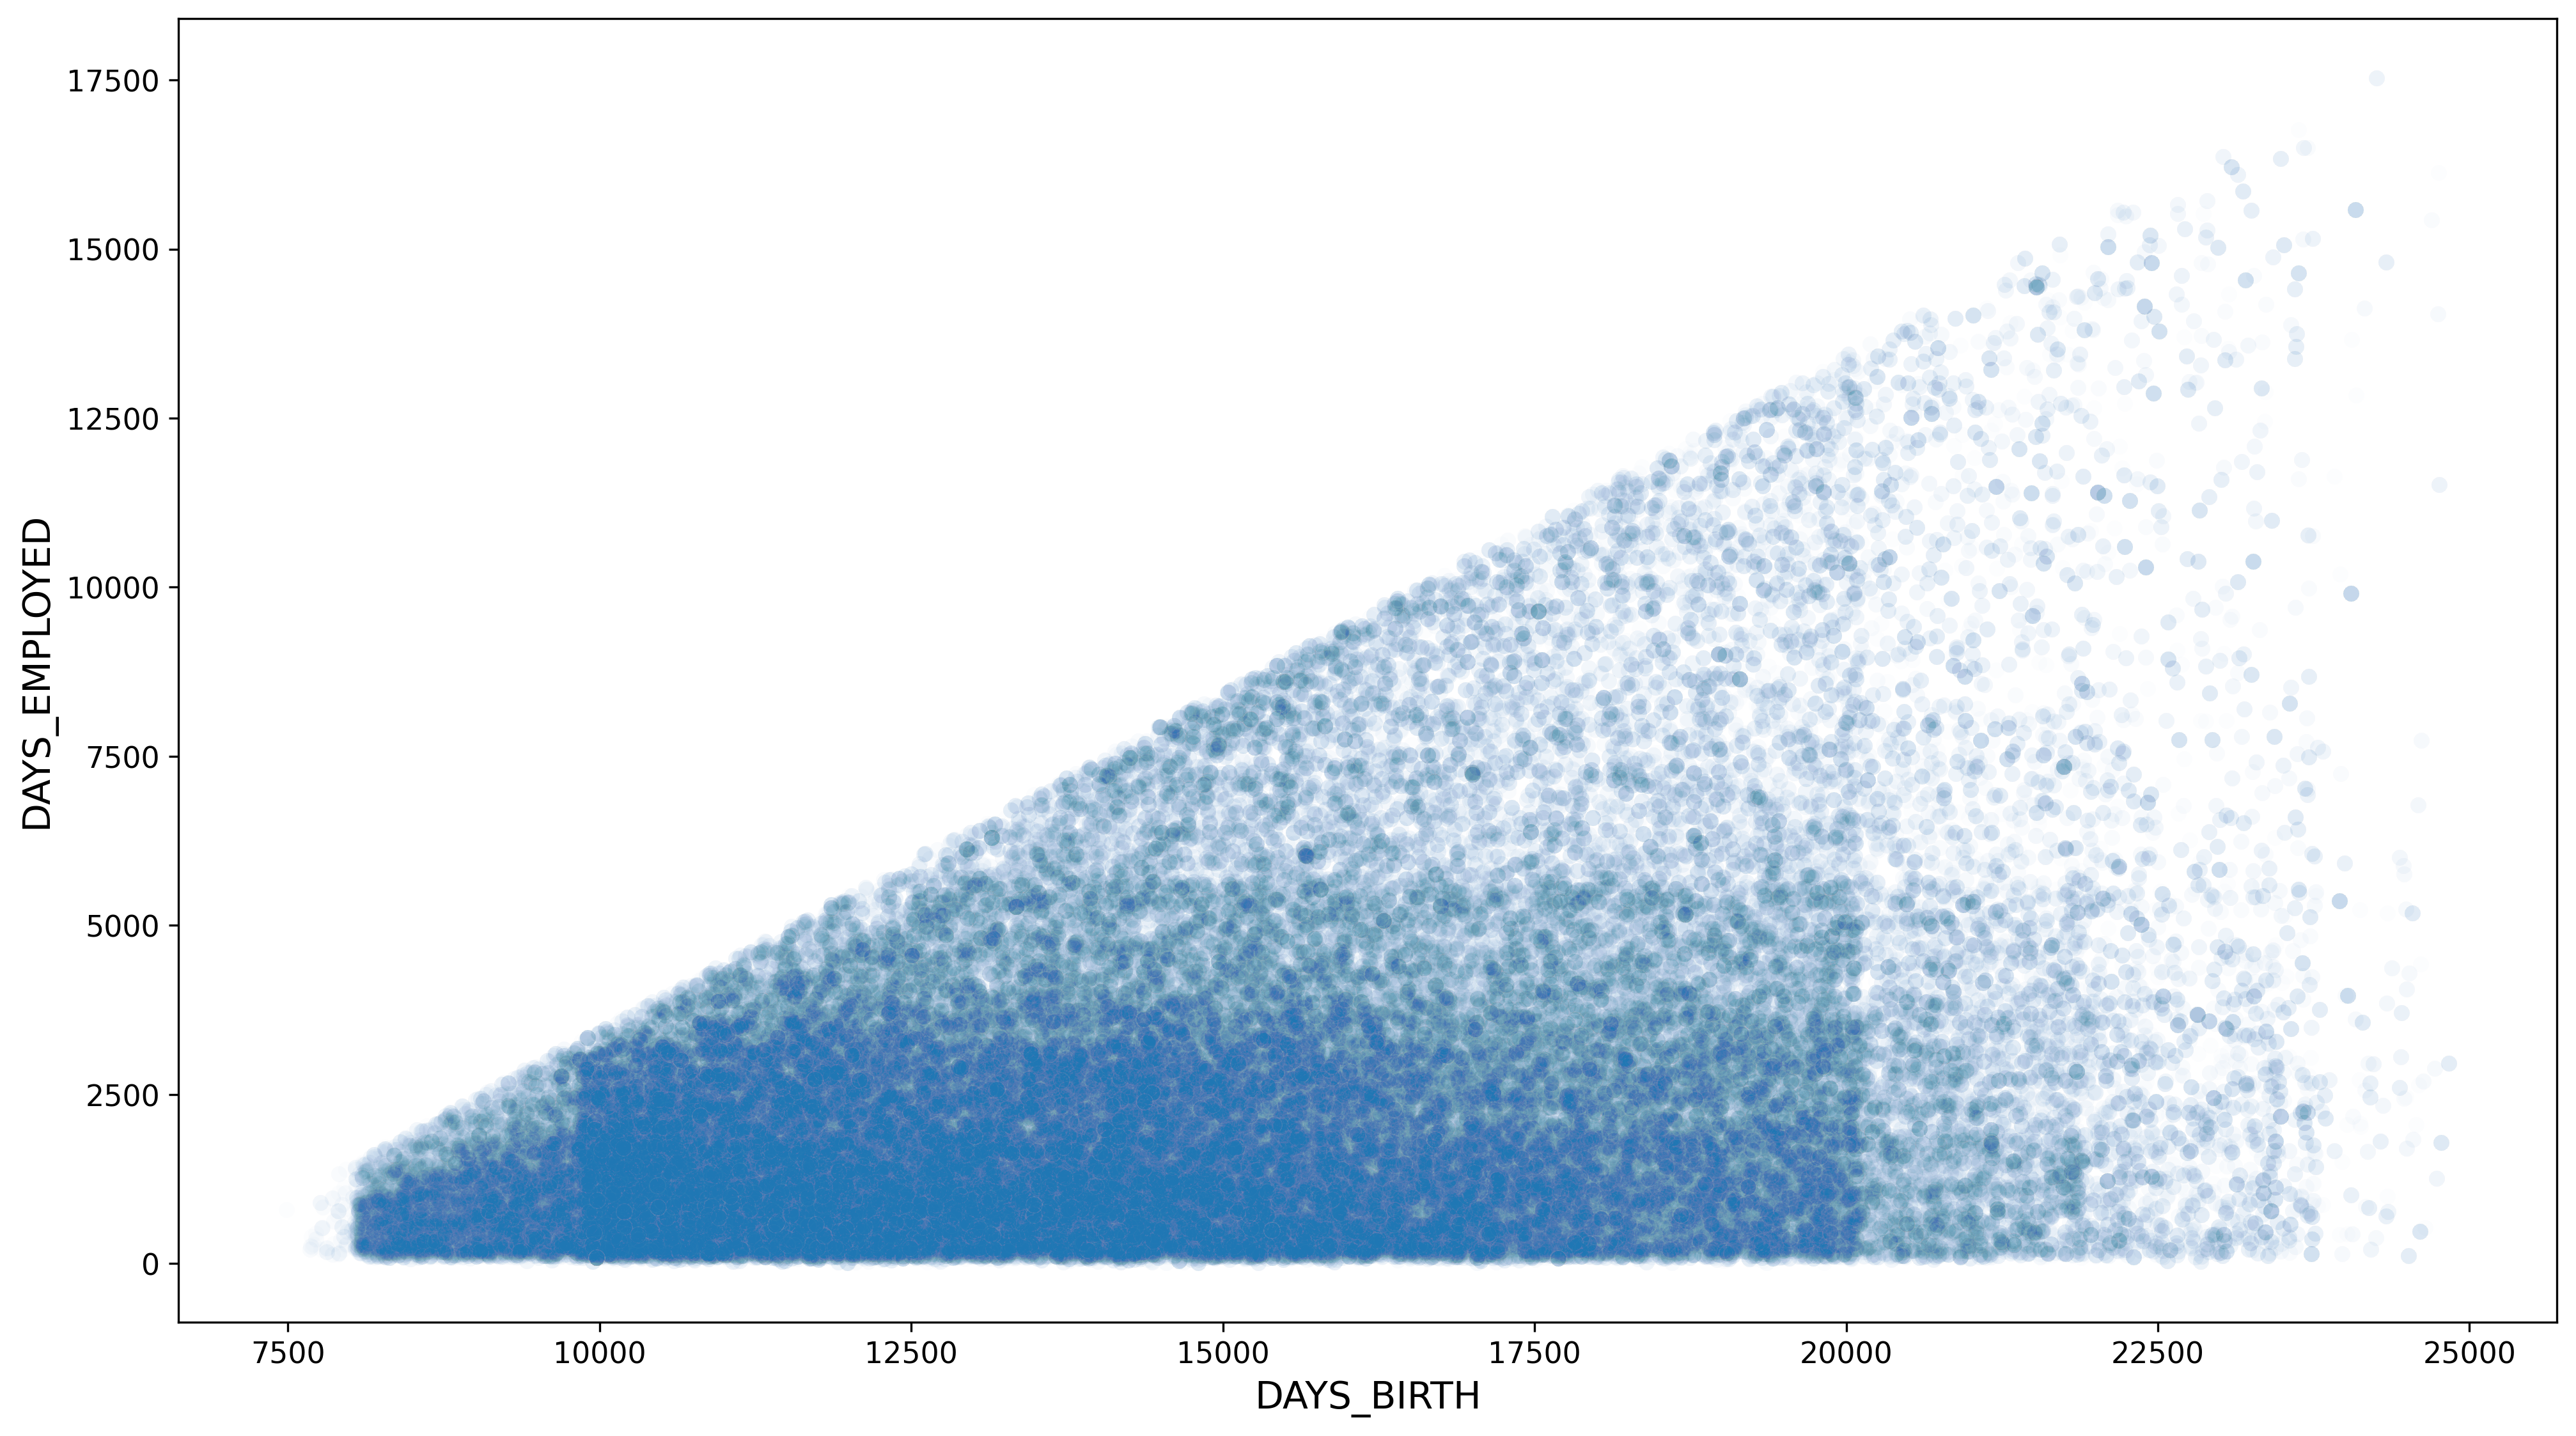

In [56]:
sns.scatterplot(data=df, x='DAYS_BIRTH_POSITIVE', y='UNEMPLOYED', alpha=0.01, lw=5)
plt.xlabel(xlabel='DAYS_BIRTH')
plt.ylabel(ylabel='DAYS_EMPLOYED')

In [57]:
df['Age in Years'] = -df['DAYS_BIRTH']/365

In [58]:
df['Age in Years']

0         32.890411
1         32.890411
2         58.832877
3         52.356164
4         52.356164
            ...    
438552    62.238356
438553    43.668493
438554    22.380822
438555    59.378082
438556    51.665753
Name: Age in Years, Length: 438557, dtype: float64

<AxesSubplot:xlabel='Age in Years', ylabel='Count'>

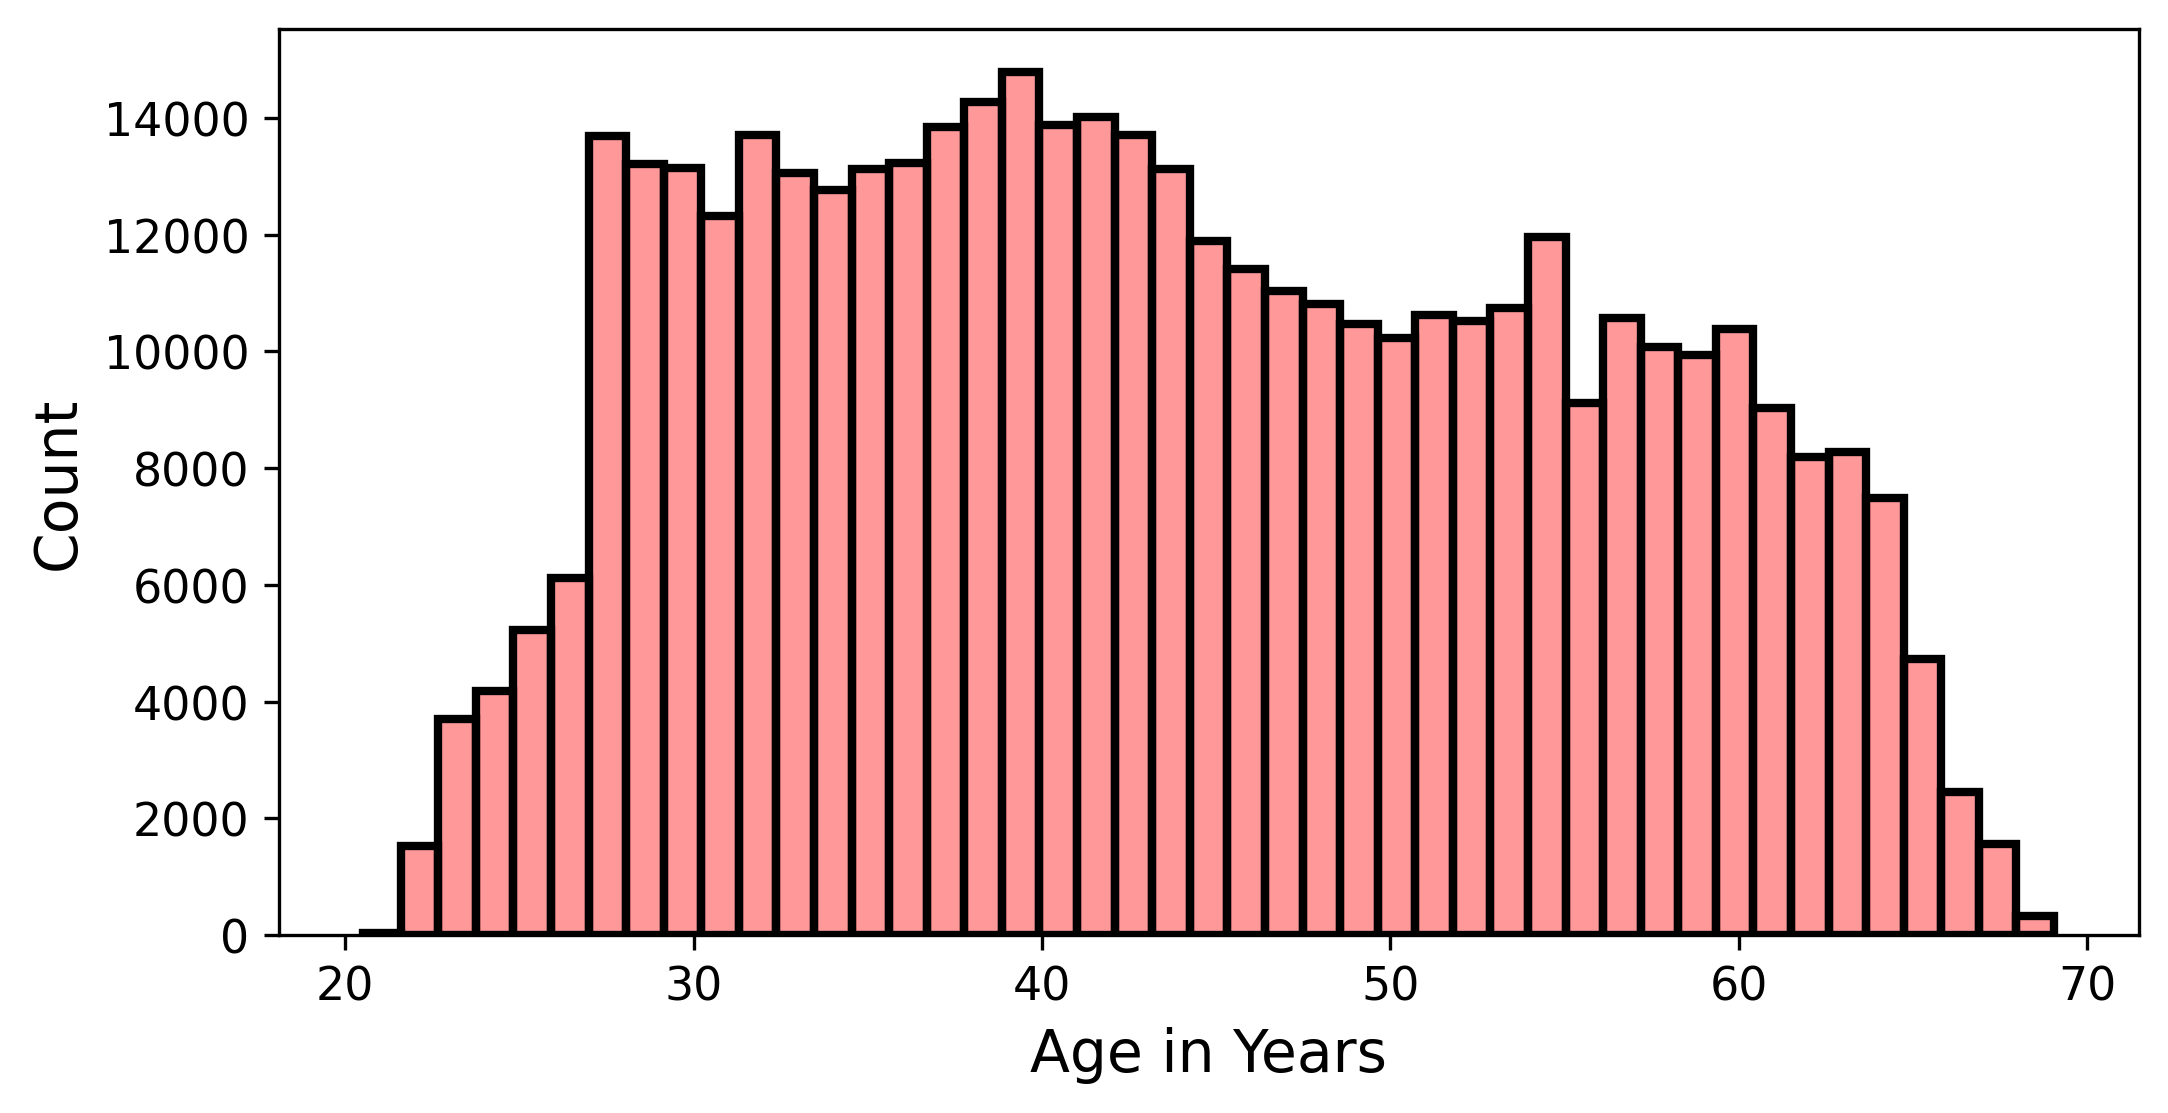

In [59]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='Age in Years', bins=45, lw=2, edgecolor='black', alpha=0.4, color='red')

In [60]:
df['NAME_FAMILY_STATUS'].value_counts()

Married                 299828
Single / not married     55271
Civil marriage           36532
Separated                27251
Widow                    19675
Name: NAME_FAMILY_STATUS, dtype: int64

In [61]:
df[df['NAME_FAMILY_STATUS'].isnull()]

Empty DataFrame
Columns: [ID, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, DAYS_BIRTH, DAYS_EMPLOYED, FLAG_MOBIL, FLAG_WORK_PHONE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, UNEMPLOYED, DAYS_BIRTH_POSITIVE, Age in Years]
Index: []

[0 rows x 21 columns]

In [62]:
df['AMT_INCOME_TOTAL'].sort_values().mean()

187524.2860095039

In [63]:
df[df['AMT_INCOME_TOTAL'] < df['AMT_INCOME_TOTAL'].mean()]['AMT_INCOME_TOTAL']

2         112500.0
13        135000.0
14        135000.0
15        135000.0
16        135000.0
            ...   
438552    135000.0
438553    103500.0
438554     54000.0
438555     72000.0
438556    121500.0
Name: AMT_INCOME_TOTAL, Length: 271044, dtype: float64

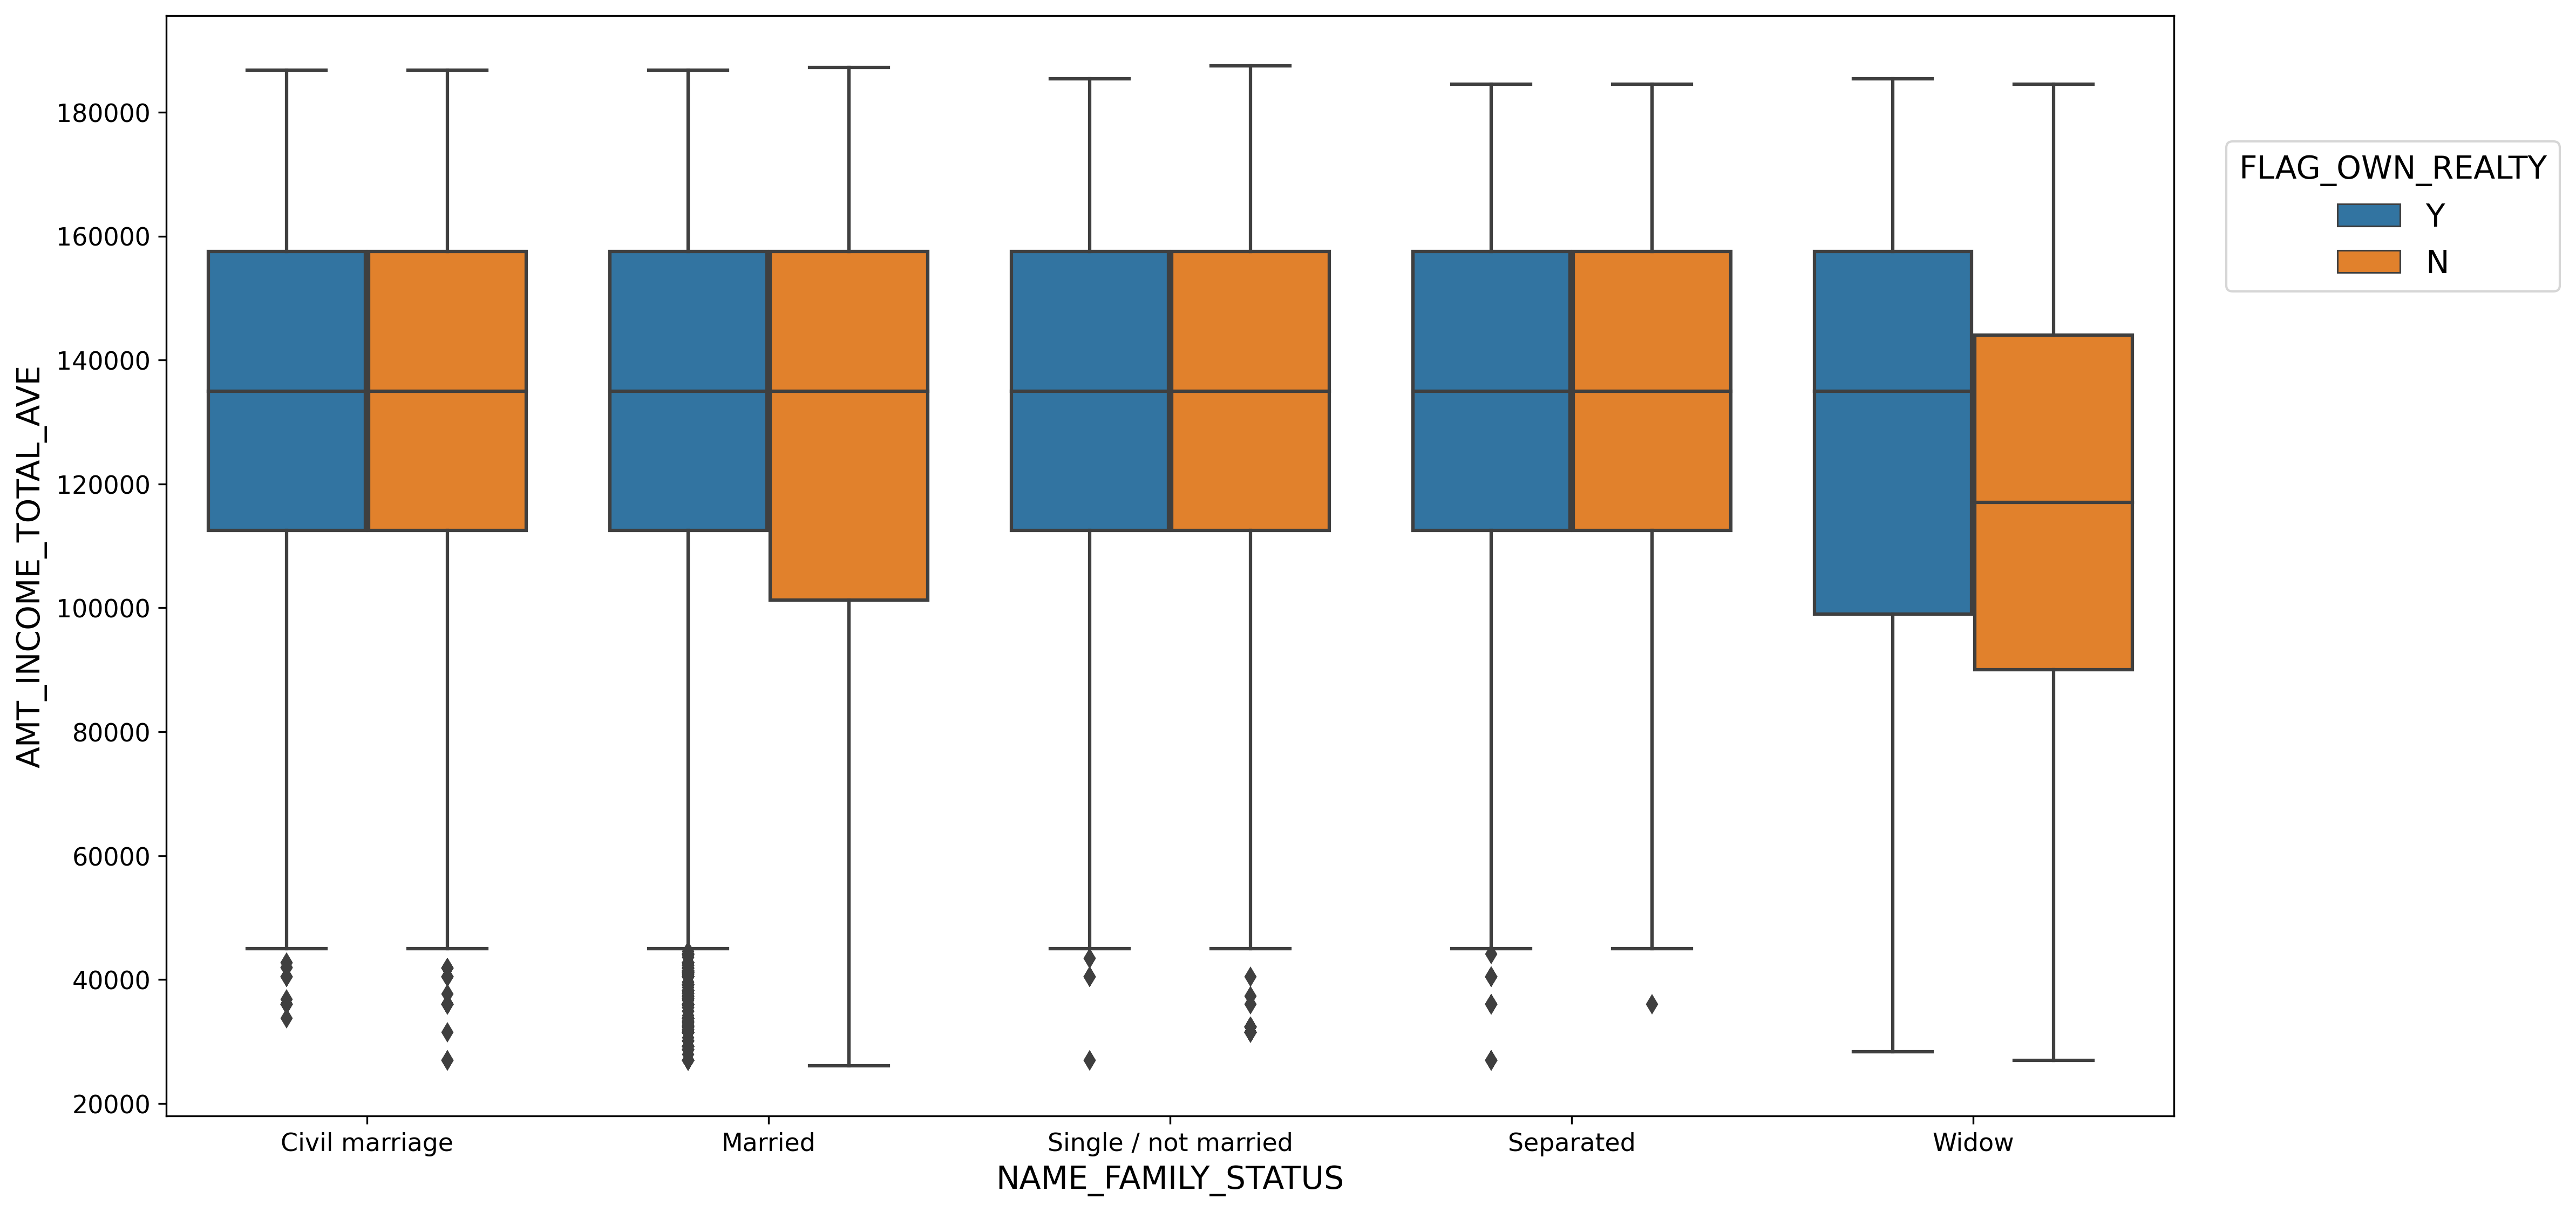

In [64]:
df['AMT_INCOME_TOTAL_AVE'] = df[df['AMT_INCOME_TOTAL'] < df['AMT_INCOME_TOTAL'].mean()]['AMT_INCOME_TOTAL']
sns.boxplot(data=df, x='NAME_FAMILY_STATUS', y='AMT_INCOME_TOTAL_AVE', hue='FLAG_OWN_REALTY')
plt.legend(bbox_to_anchor=(1.2,0.9), title = 'FLAG_OWN_REALTY')

In [65]:
flag_mobil = df.dropna(axis=0, subset='FLAG_MOBIL')

In [66]:
flag_mobil

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0       5008804           M            Y               Y             0   
1       5008805           M            Y               Y             0   
2       5008806           M            Y               Y             0   
3       5008808           F            N               Y             0   
4       5008809           F            N               Y             0   
...         ...         ...          ...             ...           ...   
438552  6840104           M            N               Y             0   
438553  6840222           F            N               N             0   
438554  6841878           F            N               N             0   
438555  6842765           F            N               Y             0   
438556  6842885           F            N               Y             0   

        AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0               427500.0               Working               Higher education   
1               427500.0               Working               Higher education   
2               112500.0               Working  Secondary / secondary special   
3               270000.0  Commercial associate  Secondary / secondary special   
4               270000.0  Commercial associate  Secondary / secondary special   
...                  ...                   ...                            ...   
438552          135000.0             Pensioner  Secondary / secondary special   
438553          103500.0               Working  Secondary / secondary special   
438554           54000.0  Commercial associate               Higher education   
438555           72000.0             Pensioner  Secondary / secondary special   
438556          121500.0               Working  Secondary / secondary special   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  ...  FLAG_MOBIL  \
0             Civil marriage   Rented apartment  ...           1   
1             Civil marriage   Rented apartment  ...           1   
2                    Married  House / apartment  ...           1   
3       Single / not married  House / apartment  ...           1   
4       Single / not married  House / apartment  ...           1   
...                      ...                ...  ...         ...   
438552             Separated  House / apartment  ...           1   
438553  Single / not married  House / apartment  ...           1   
438554  Single / not married       With parents  ...           1   
438555               Married  House / apartment  ...           1   
438556               Married  House / apartment  ...           1   

        FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE  \
0                     1           0           0              NaN   
1                     1           0           0              NaN   
2                     0           0           0   Security staff   
3                     0           1           1      Sales staff   
4                     0           1           1      Sales staff   
...                 ...         ...         ...              ...   
438552                0           0           0              NaN   
438553                0           0           0         Laborers   
438554                1           0           0      Sales staff   
438555                0           0           0              NaN   
438556                0           1           0      Sales staff   

        CNT_FAM_MEMBERS UNEMPLOYED  DAYS_BIRTH_POSITIVE  Age in Years  \
0                   2.0     4542.0                12005     32.890411   
1                   2.0     4542.0                12005     32.890411   
2                   2.0     1134.0                21474     58.832877   
3                   1.0     3051.0                19110     52.356164   
4                   1.0     3051.0                19110     52.356164   
...                 ...        ...                  ...           ...   
438552

In [67]:
df[df['FLAG_MOBIL'].isnull()]

Empty DataFrame
Columns: [ID, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, DAYS_BIRTH, DAYS_EMPLOYED, FLAG_MOBIL, FLAG_WORK_PHONE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, UNEMPLOYED, DAYS_BIRTH_POSITIVE, Age in Years, AMT_INCOME_TOTAL_AVE]
Index: []

[0 rows x 22 columns]

In [79]:
df_non_flag = df.drop(columns=['FLAG_MOBIL','CODE_GENDER'])

In [80]:
df_non_flag

ID FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0       5008804            Y               Y             0          427500.0   
1       5008805            Y               Y             0          427500.0   
2       5008806            Y               Y             0          112500.0   
3       5008808            N               Y             0          270000.0   
4       5008809            N               Y             0          270000.0   
...         ...          ...             ...           ...               ...   
438552  6840104            N               Y             0          135000.0   
438553  6840222            N               N             0          103500.0   
438554  6841878            N               N             0           54000.0   
438555  6842765            N               Y             0           72000.0   
438556  6842885            N               Y             0          121500.0   

            NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0                    Working               Higher education   
1                    Working               Higher education   
2                    Working  Secondary / secondary special   
3       Commercial associate  Secondary / secondary special   
4       Commercial associate  Secondary / secondary special   
...                      ...                            ...   
438552             Pensioner  Secondary / secondary special   
438553               Working  Secondary / secondary special   
438554  Commercial associate               Higher education   
438555             Pensioner  Secondary / secondary special   
438556               Working  Secondary / secondary special   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0             Civil marriage   Rented apartment      -12005          -4542   
1             Civil marriage   Rented apartment      -12005          -4542   
2                    Married  House / apartment      -21474          -1134   
3       Single / not married  House / apartment      -19110          -3051   
4       Single / not married  House / apartment      -19110          -3051   
...                      ...                ...         ...            ...   
438552             Separated  House / apartment      -22717         365243   
438553  Single / not married  House / apartment      -15939          -3007   
438554  Single / not married       With parents       -8169           -372   
438555               Married  House / apartment      -21673         365243   
438556               Married  House / apartment      -18858          -1201   

        FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0                     1           0           0             NaN   
1                     1           0           0             NaN   
2                     0           0           0  Security staff   
3                     0           1           1     Sales staff   
4                     0           1           1     Sales staff   
...                 ...         ...         ...             ...   
438552                0           0           0             NaN   
438553                0           0           0        Laborers   
438554                1           0           0     Sales staff   
438555                0           0           0             NaN   
438556                0           1           0     Sales staff   

        CNT_FAM_MEMBERS  UNEMPLOYED  DAYS_BIRTH_POSITIVE  Age in Years  \
0                   2.0      4542.0                12005     32.890411   
1                   2.0      4542.0                12005     32.890411   
2                   2.0      1134.0                21474     58.832877   
3                   1.0      3051.0                19110     52.356164   
4                   1.0      3051.0                19110     52.356164   
...                 ...         ...                  ...           ...   
438552              1.0         NaN

<AxesSubplot:>

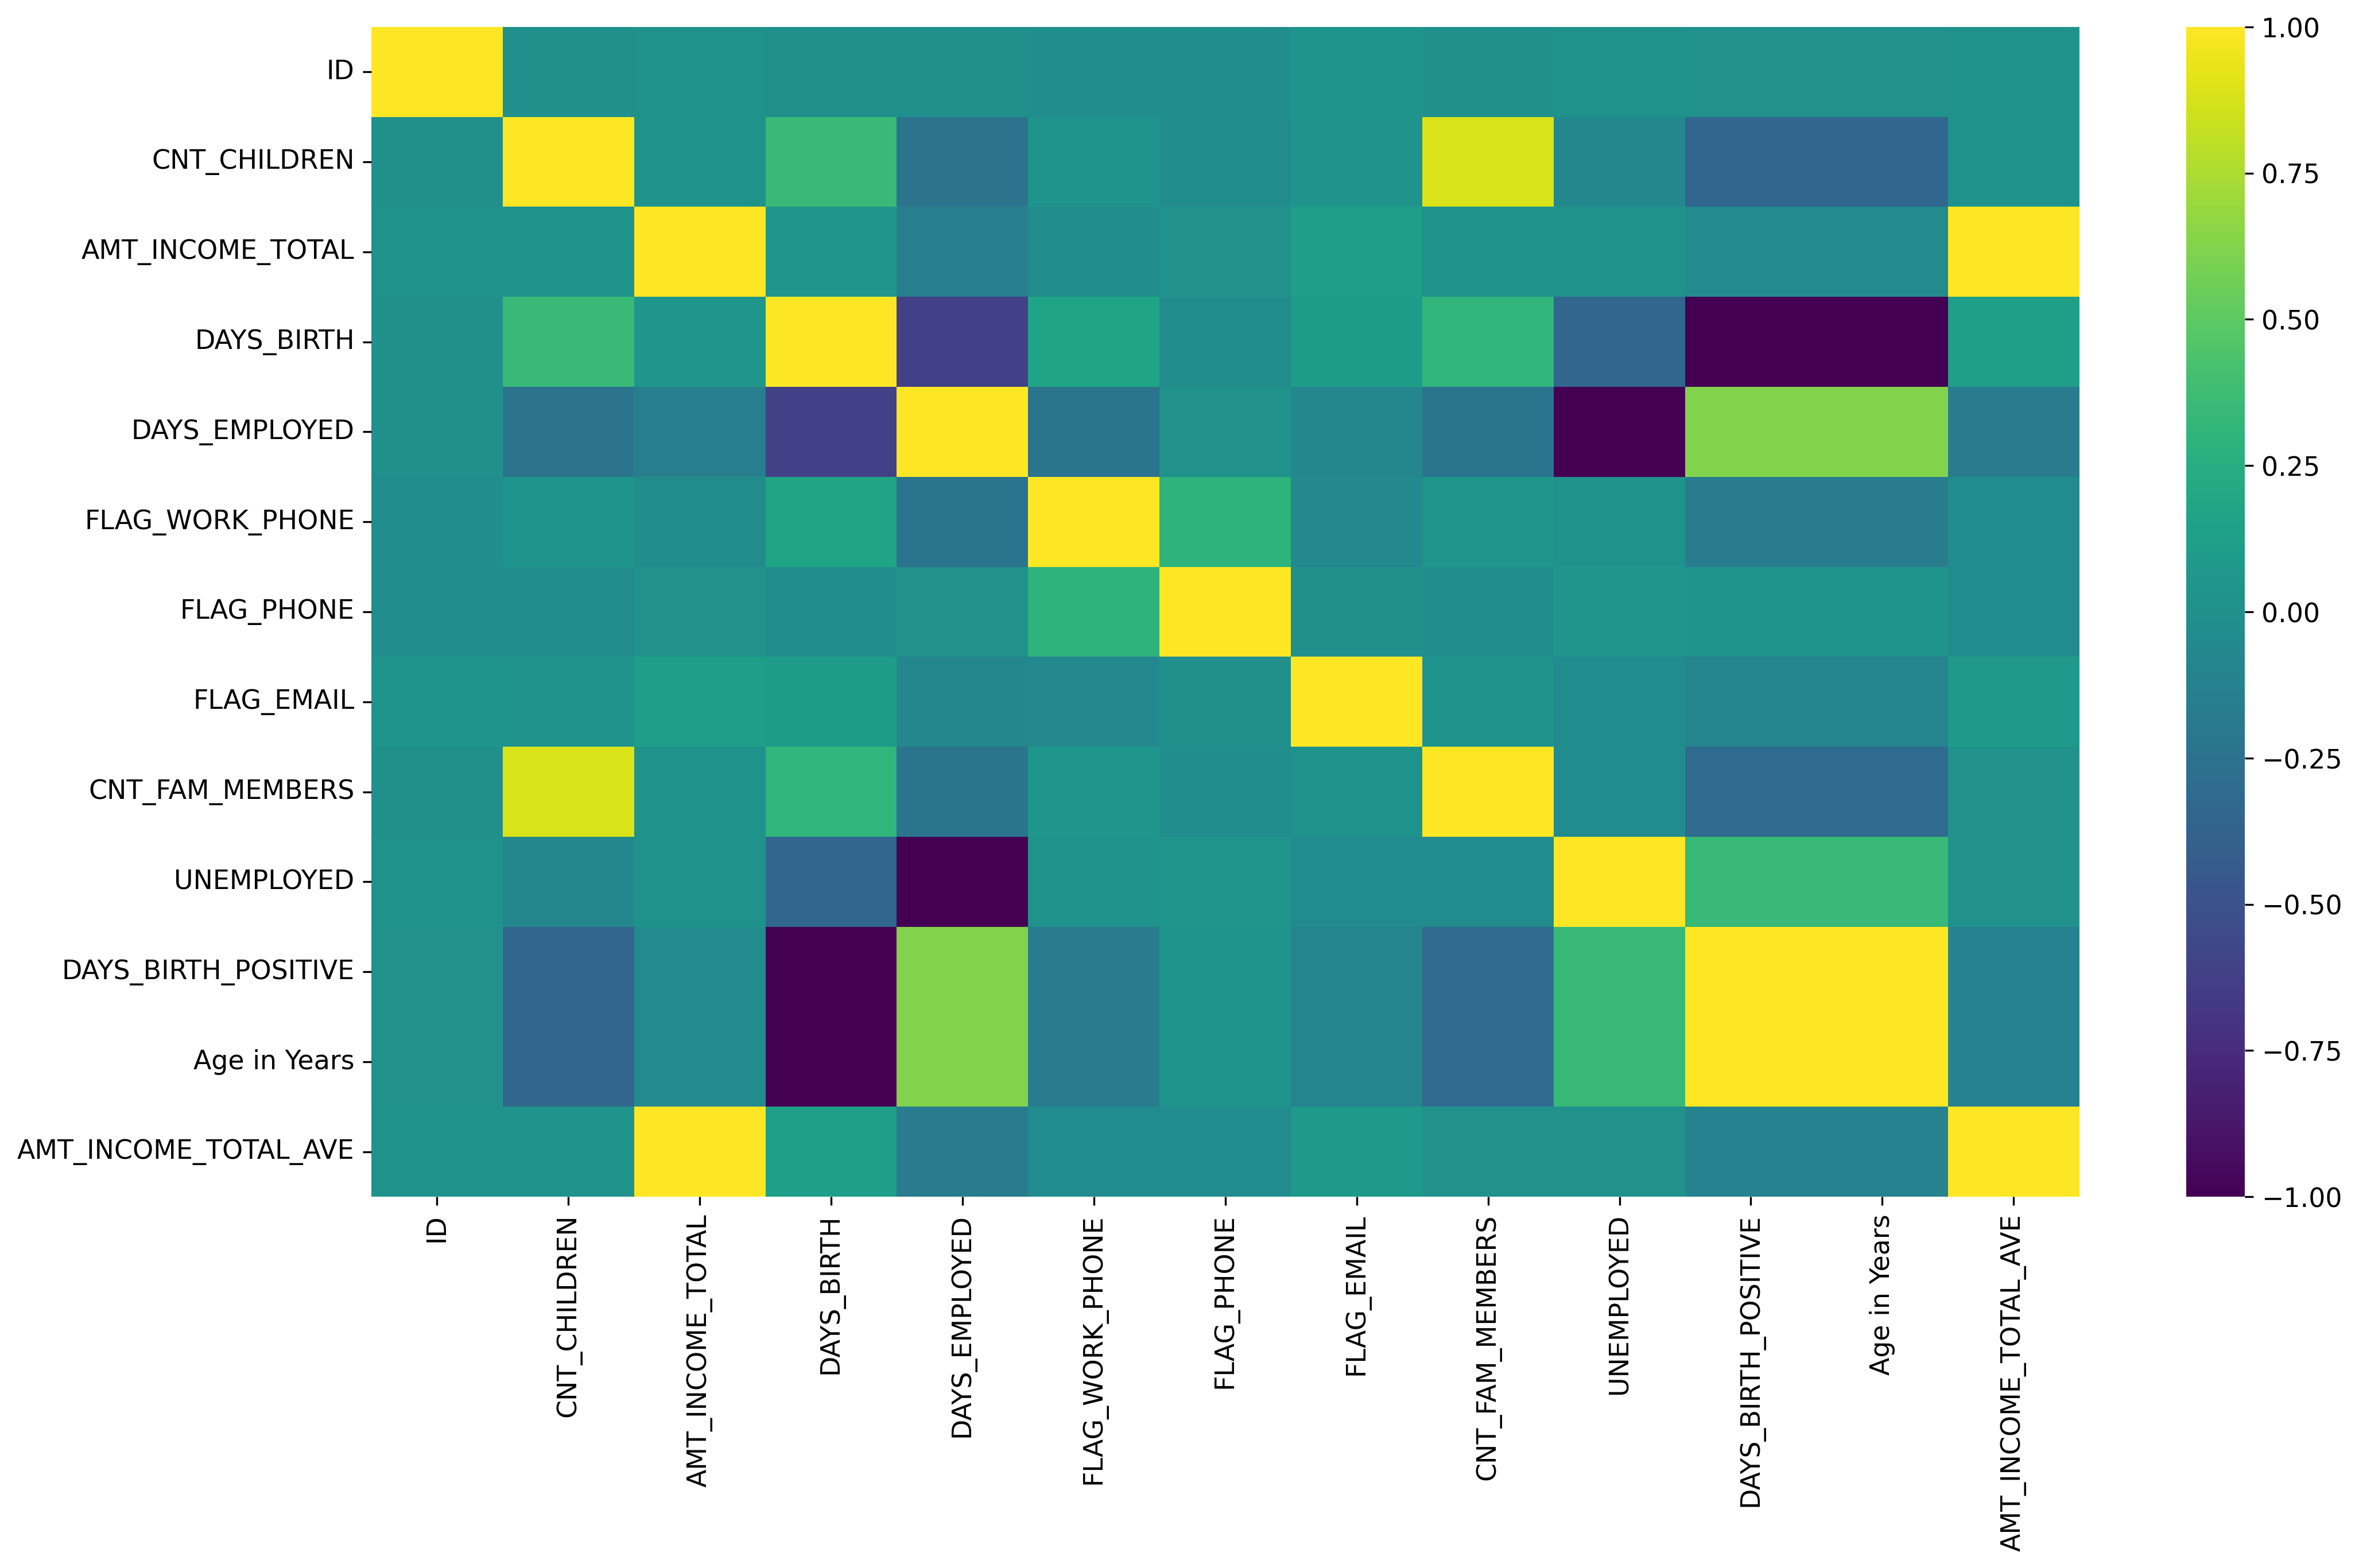

In [84]:
sns.heatmap(data=df_non_flag.corr(), cmap='viridis')